# A Tutorial Introduction to BeautifulSoup
### Jiang Shang | Karishma Velagaleti | Aditya Tripathi | Satyarth

## (1) Motivation 

In the age of big data, most of our data is available not just in the form of excel or CSV files but also in the form of content on the internet. Internet has become a big source of data for many analysts. The biggest motivation behind taking up this package is the need and use of web-scraping in today's era. Web scraping is automating the extraction of unstructured data on the web into a format so that you can easily analyse or make use of it. BeautifulSoup is a Python library used for pulling data out of web pages which could be in the form of either HTML or XML files. 

Beautiful Soup transforms a complex HTML document into a tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: Tag, NavigableString, BeautifulSoup, and Comment.

The principle by which it works is that it can turn even invalid markup into a parse tree and thus perform navigating, searching, and modifying. It is a toolkit to dissect a document and find what you need fast. It can save programmers considerable amount of time. Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and Beautiful Soup can't detect one. Then you just have to specify the original encoding.

However, BeautifulSoup itself does not do page wrapping, which means it relies on other packages such as requests or urllib.request to read and wrap up the orignal content in a webpage.

Beautiful Soup 3 has been replaced by Beautiful Soup 4. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on all versions including Python 3.x. This toolkit will focus on Beautiful Soup 4

## (2) Context - alternative solutions for solving the problem

Some other alternative solutions to Web-scrapping include the following: 

1. lxml - The lxml XML toolkit is a Pythonic binding for the C libraries libxml2 and libxslt. It is unique in that it combines the speed and XML feature completeness of these libraries with the simplicity of a native Python API, mostly compatible but superior to the well-known ElementTree API.

2. html(python's built-in library) - It’s the basic HTML parser built for Python.

3. Scrapy - Scrapy is an application framework for crawling web sites and extracting structured data which can be used for a wide range of useful applications, like data mining, information processing or historical archival.

4. Scrapemark - It utilizes an HTML-like markup language to extract the data you need. You get your results as plain old Python lists and dictionaries. Scrapemark internally utilizes regular expressions and is super-fast. However, it is no longer maintained.

5. Mechanize

Lxml: 
HTMLparser: It’s the basic HTML parser built for Python.
Scrapemark: It utilizes an HTML-like markup language to extract the data you need. You get your results as plain old Python lists and dictionaries. Scrapemark internally utilizes regular expressions and is super-fast. However, it is no longer maintained.
Scrapy: Scrapy is an application framework for crawling web sites and extracting structured data which can be used for a wide range of useful applications, like data mining, information processing or historical archival.


## (3) Installation instructions, platform restriction and dependent libraries

###### INSTALLATION INSTRUCTIONS

The current release is Beautiful Soup 4.5.3 (January 2, 2017). You can install Beautiful Soup 4 with pip install beautifulsoup4:

$ pip install beautifulsoup4

If you’re using a recent version of Debian or Ubuntu Linux, you can install Beautiful Soup with the system package manager:

$ apt-get install python-bs4



###### PLATFORM RESTRICTIONS

Beautiful Soup 4 is published through PyPi, so if you can’t install it with the system packager, you can install it with easy_install or pip. The package name is beautifulsoup4, and the same package works on Python 2 and Python 3.

$ easy_install beautifulsoup4

###### DEPENDENT LIBRARIES

Beautiful supports the "html parser" but can also support other third party parsers like lxml/html5lib parser. lxml parsers can be installed by using one of the following commands:

1. 

    $ apt-get install python-lxml

    $ easy_install lxml

    $ pip install lxml

    $ pip install html5lib



To start web-scrapping you will need to import three very basic and important libraries:

2.from bs4 import BeautifulSoup # this is used for BeautifulSoup 4

3.import urllib.request as urllib2 # this is used to open URLs

4.import requests 


## (4) Minimal working example

In [ ]:
from bs4 import BeautifulSoup
import urllib.request as urllib2

url = "http://www.simon.rochester.edu"
web_page = urllib2.urlopen(url)

soup = BeautifulSoup(web_page, "html.parser")
print(soup.prettify())

In [ ]:
# printing all URLs on "simon.rochester.edu"
all_urls = soup.find_all("a")
for link in all_urls:
    print (link.get("href"))

## (5) 2-3 examples of typical use-cases

### The following image a wikipedia page regarding panama papers. Now let's practice using BeautifulSoup to extract some information from this page

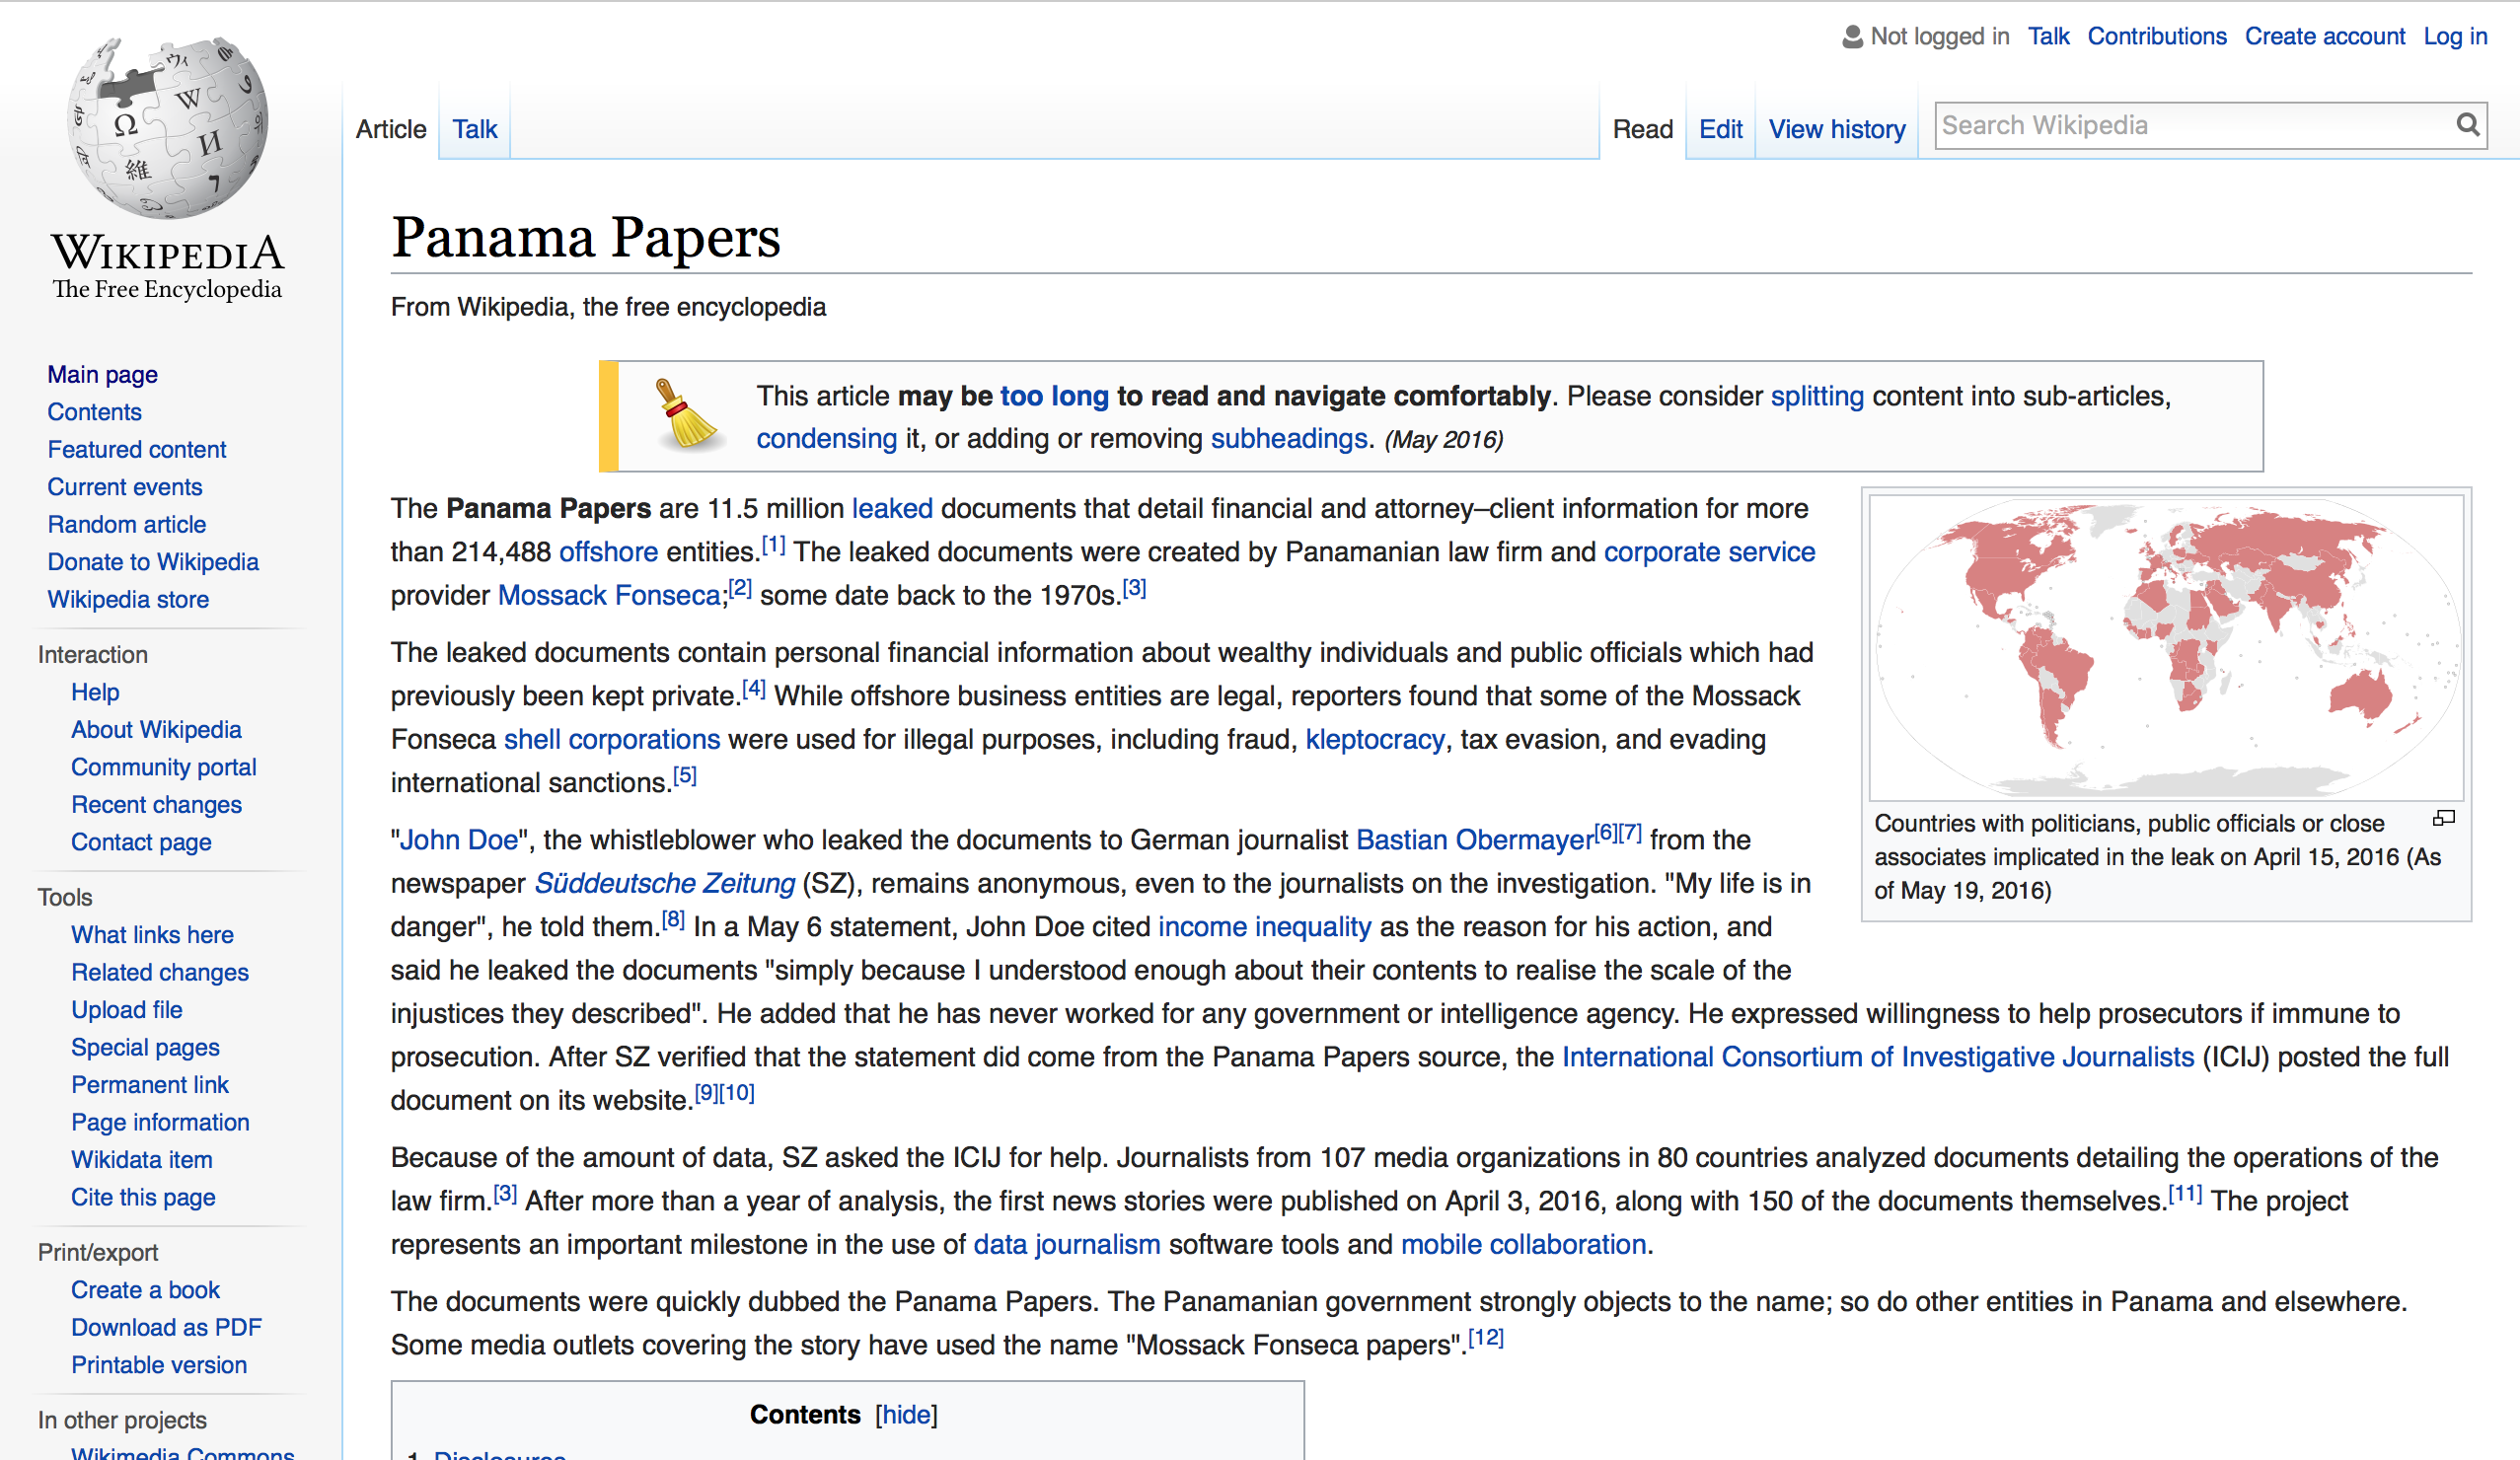

In [3]:
from IPython.display import Image
Image('Panama_Papers.png',width=580,height=500)

### First, let's use this package named requests to grab the content of this page

In [ ]:
page=requests.get('https://en.wikipedia.org/wiki/Panama_Papers')

### Now we've had it, let's take a look at how this beautifully presented webpage really look like in its source code

In [ ]:
page.content

### Wow, this look just awful, imagine we have to read through this junk?

### Thanks to BeautifulSoup, we don't have to. Let's now make it look a little bit more pretty by first turning it into a BeautifulSoup object.

In [ ]:
soup = BeautifulSoup(page.text,'html.parser')

In [ ]:
soup

### Now this looks much more organized, isn't it?

### Of course BeautifulSoup can be much more than this, it has many pre-defined functions calling which can get you what you want in an instant. A quintessential example is to get all the hyperlinks on the present page. We can acheive this by using the find_all( ) function. Notice that the reason we can do this is becuase for html file, every hyperlink is taged with the < a > tag. The find_all( ) method looks through a tag’s descendants and retrieves all descendants that match your filters [4].

In [ ]:
findings=soup.find_all('a')
findings

In [ ]:
'''Notice that we can modify our desired number of output by adjusting the parameter limit. By setting limit=7, we are
telling the computer we just want 7 outputs and that's enough. The find_all( ) function will then return the first 7
a taged links to us'''

soup.find_all('a',limit=7)

### We are not done yet. The above findings shows a lot of other information we just don't care at this point. All we want is just pure links. We then write a for loop to iterate through each line looking for attribute "href" with a get function. 

In [ ]:
for line in findings:
    
    temp=line.get('href')
    
    if temp == None:
        pass
    
    elif temp.startswith('#'):
        print('https://en.wikipedia.org/wiki/Panama_Papers'+temp)
    
    elif temp.startswith('/'):
        print('https://en.wikipedia.org'+temp)
    
    else:
        print(temp)
   

### Another common task is to extract all the text from the page, where get_text( ) function comes in handy.

In [ ]:
print(soup.get_text())

### It can also find all tables 

In [ ]:
tables_all=soup.find_all('table')
tables_all

### Or just find tables that suits our interest by passing in a value to the class attribute

In [ ]:
tables=soup.find_all('table', class_="wikitable zebra")
tables

### Or you are interested in checking all the images on that page

In [ ]:
imgs=soup.find_all("img", src=True)
for img in imgs:
    output='https:'+img['src']
    print(output)

## (6) List other interesting or useful features (additional examples are not required)

Interestingly, Beautiful soup cannot handle large scale web-scraping projects. This is because BeautifulSoup doesn’t parse the HTML directly, but splits the tags in tag-soup by applying regular expressions around them. This results in taking excessive time and therefore, in such instances lxml is considered to be a better package. 

An example of large scale project and the time taken by the two packages is shown as under:

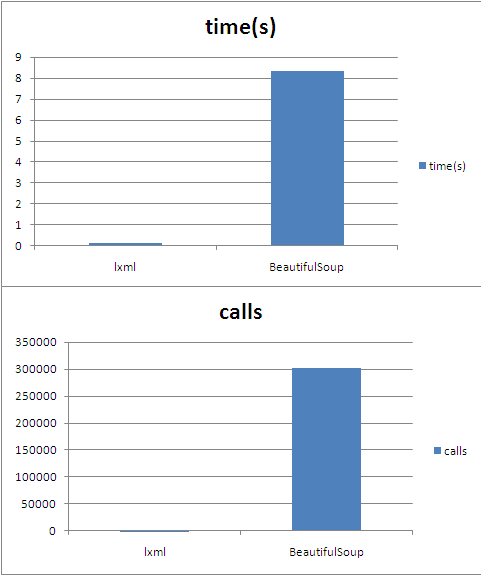

In [4]:
Image('lxml_vs_beautifulsoup.png',width=580,height=500)

## (7) Summary and personal assessment of the library

As a team we think that BeautifulSoup package is a very convenient, efficient and popular package for web-scrapping than its other alternatives. It is superior in many ways such as it can convert unstructured data into structured form. Many other alternatives such as scrapy can only be used for structured web scraping.

A question arises: why not use regular expression instead of BeautifulSoup? Since it seems that regex serves similar functions anyway. After researching, the answers boils down to speed versus robustness. Code written in BeautifulSoup is usually more robust than the one written using regular expressions while regex runs at a much faster speed than BeautifulSoup usually by a factor of 100 giving the same outcome. 

To us, BeautifulSoup is much easier to learn and use than regular expression. The syntax it uses is much more concise and much less non-sensical. It provides simple ways to navigate the data structure and extract the information we need quickly. However, in order to use this package to its full potential, it is important that we also know the stucture of html, especially its tags and what each tag represents.

## (8) Reference

[1]	M. Dad, "Beautiful soup 4 python," Python For Beginners, 2016. [Online]. Available: http://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python. Accessed: Jan. 31, 2017.


[2] L. Richardson, "Beautiful soup documentation," in Crummy, 2013. [Online]. Available: https://www.crummy.com/software/BeautifulSoup/bs3/documentation.html. Accessed: Jan. 31, 2017.

[3] L. Richardson, "Beautiful Soup," in Crummy, 2017. [Online]. Available: https://www.crummy.com/software/BeautifulSoup/. Accessed: Jan. 31, 2017.

[4]	L. Richardson, "Beautiful Soup Documentation," in Crummy. [Online]. Available: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#. Accessed: Jan. 31, 2017.

[5] S. Ray, "Beginner’s guide to Web Scraping in Python (using BeautifulSoup)," in Analytics Vidhya, 2015. [Online]. Available: https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/. Accessed: Jan. 31, 2017.

[6] "Using the Python library BeautifulSoup to extract data from a webpage (applied to World Cup rankings)"; Available at: http://zevross.com/blog/2014/05/16/using-the-python-library-beautifulsoup-to-extract-data-from-a-webpage-applied-to-world-cup-rankings/; Accessed on: Feb 17, 2017

[7] "Using BeautifulSoup to parse HTML and extract press briefings URLs" ; Available at:  http://www.compjour.org/warmups/govt-text-releases/intro-to-bs4-lxml-parsing-wh-press-briefings/; Accessed on: Feb 18, 2017

[8] "Beautiful Soup"; Available at : http://helpful.knobs-dials.com/index.php/BeautifulSoup; Accessed on: Feb 18, 2017

[9] Scrapy; Available at: https://doc.scrapy.org/en/0.24/index.html; Accessed on: Feb 18, 2017

[10] Available at: lxml.de/; Accessed on: Feb 18, 2017

[11] HTML Parser; Available at: https://docs.python.org/2/library/htmlparser.html; Accessed on Feb 18, 2017